In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython.display import display
import scipy
import seaborn as sns
from numpy import random
from fitter import Fitter, get_common_distributions, get_distributions


In [2]:
for filename in os.listdir('./'):
    if 'distr_' in filename:
        f = open(filename)
        exec(filename.split('.')[0]+'=pd.read_csv(filename,header=None)')

# 1 distr_a.txt

Text(0, 0.5, 'count')

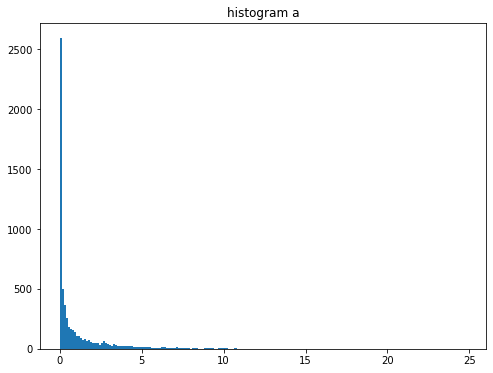

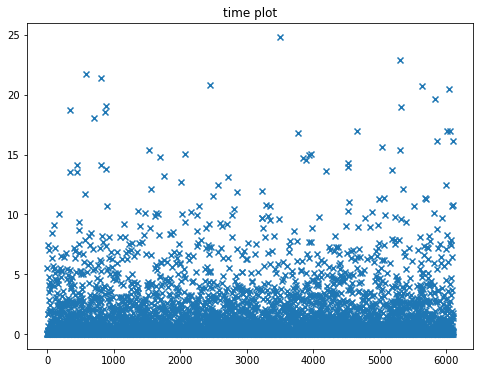

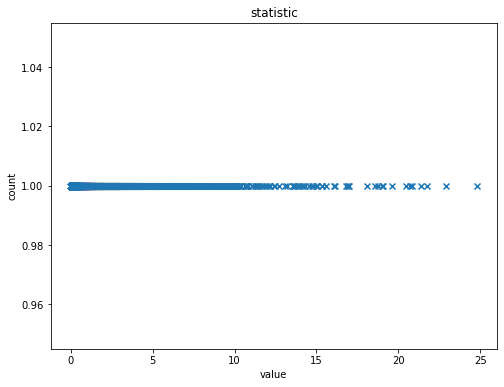

In [3]:
distr_a = pd.read_csv('distr_a.txt',header=None)
data_a = distr_a.iloc[:,0]

plt.figure(figsize=(8,6))
plt.hist(distr_a, bins=200)
plt.title('histogram a')

plt.figure(figsize=(8,6))
plt.scatter(np.arange(0,data_a.shape[0]),data_a,marker='x')
plt.title('time plot')

counta = pd.value_counts(data_a, sort=True)
idxa = counta.index.tolist()
valuea = counta.values.tolist()
plt.figure(figsize=(8,6))
plt.scatter(idxa,valuea,marker='x')
plt.title('statistic')
plt.xlabel('value')
plt.ylabel('count')


p= 0.26667436880777784
lamda= 4.29991380079611


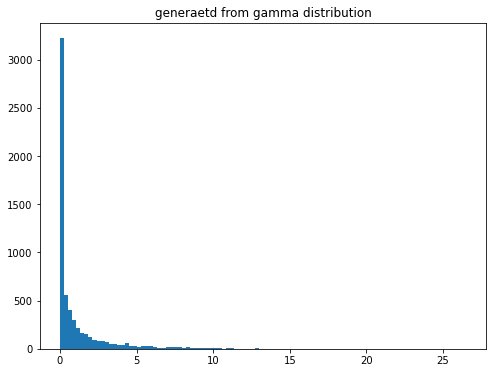

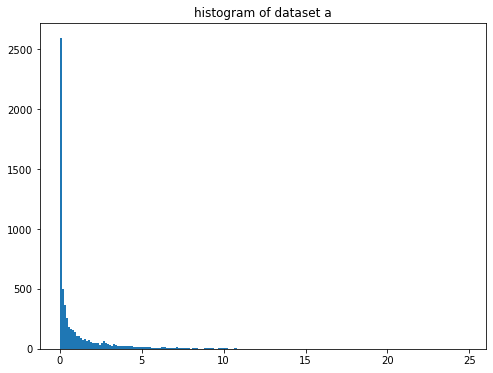

In [4]:
from scipy.stats import gamma
# gamma distribution
mean_a = data_a.mean()
var_a = data_a.var()
# method of moments
p = mean_a**2/var_a
lamda = var_a/mean_a
s = np.random.gamma(p, lamda, data_a.size)
plt.figure(figsize=(8,6))
plt.hist(s, bins=100);
plt.title('generaetd from gamma distribution')

plt.figure(figsize=(8,6))
plt.hist(distr_a, bins=200)
plt.title('histogram of dataset a')

print('p=',str(p))
print('lamda=',str(lamda))

# 2 distr_b.txt

Text(0, 0.5, 'count')

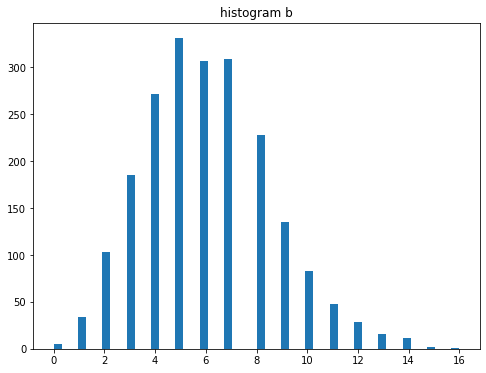

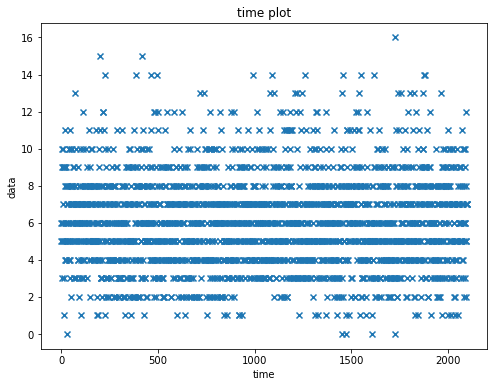

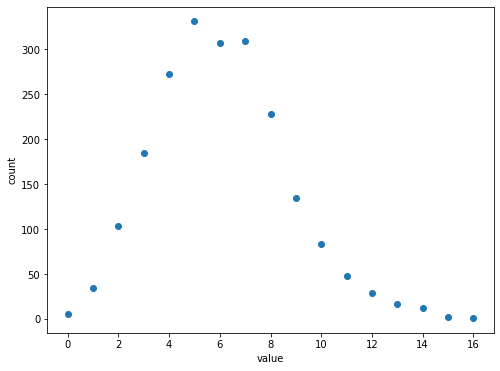

In [5]:
distr_b=pd.read_csv('distr_b.txt',header=None)
data_b = distr_b.iloc[:,0]

plt.figure(figsize=(8,6))
plt.hist(distr_b, bins=50)
plt.title('histogram b')

plt.figure(figsize=(8,6))
plt.scatter(np.arange(0,data_b.size),data_b,marker='x')
plt.title('time plot')
plt.xlabel('time')
plt.ylabel('data')

countb = pd.value_counts(data_b, sort=True)
idxb = countb.index.tolist()
valueb = countb.values.tolist()
plt.figure(figsize=(8,6))
plt.scatter(idxb,valueb)
plt.xlabel('value')
plt.ylabel('count')

lamda= 6.052380952380952


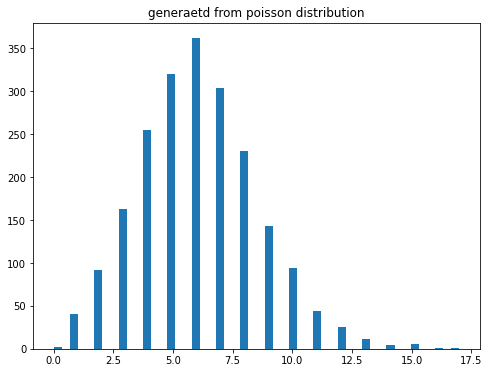

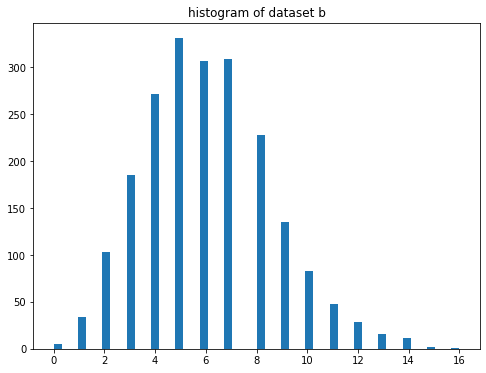

In [6]:
# poisson distribution
mean_b = data_b.mean()

s = np.random.poisson(mean_b, distr_b.size)
plt.figure(figsize=(8,6))
plt.hist(s, bins=50)
plt.title('generaetd from poisson distribution')

plt.figure(figsize=(8,6))
plt.hist(data_b, bins=50)
plt.title('histogram of dataset b')

print('lamda=',str(mean_b))


# 3 distr_c.txt

Text(0, 0.5, 'count')

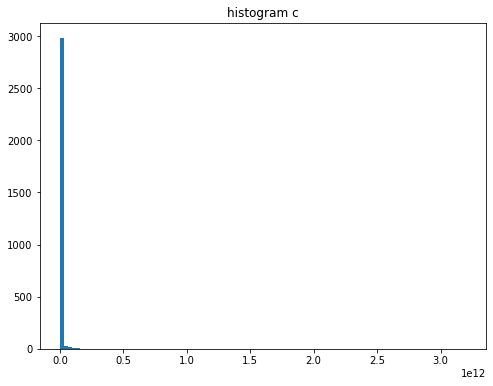

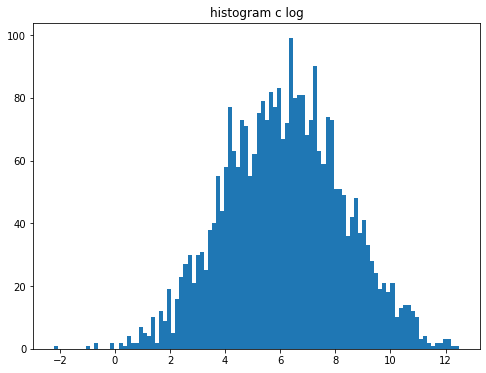

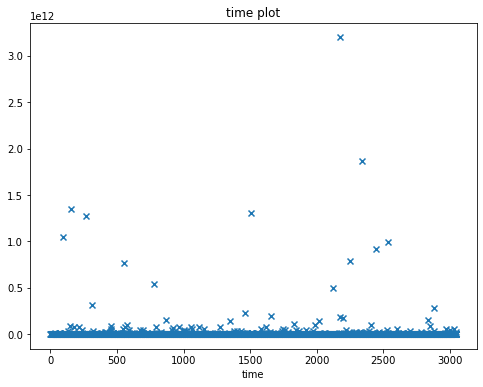

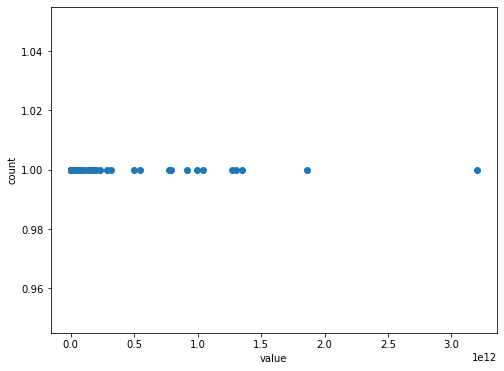

In [10]:
distr_c=pd.read_csv('distr_c.txt',header=None)
data_c = pd.Series(distr_c.loc[:,0])
log_c = pd.Series(np.log10(x) for x in data_c.tolist())

plt.figure(figsize=(8,6))
plt.hist(data_c, bins=100)
plt.title('histogram c')

plt.figure(figsize=(8,6))
plt.hist(log_c, bins=100)
plt.title('histogram c log')

plt.figure(figsize=(8,6))
plt.scatter(np.arange(0,data_c.size),data_c,marker='x')
plt.title('time plot')
plt.xlabel('time')

countc = pd.value_counts(data_c, sort=True)
idxc = countc.index.tolist()
valuec = countc.values.tolist()
plt.figure(figsize=(8,6))
plt.scatter(idxc,valuec)
plt.xlabel('value')
plt.ylabel('count')

6.148758422680645
4.604893668438957


Text(0.5, 1.0, 'histogram of dataset c(log)')

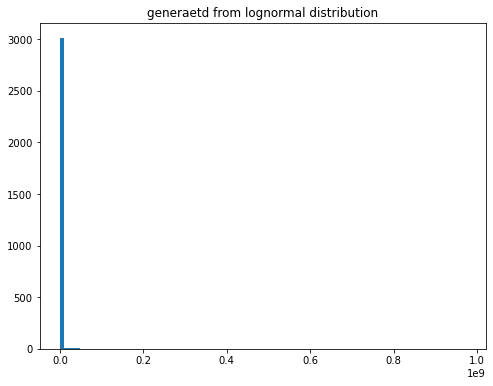

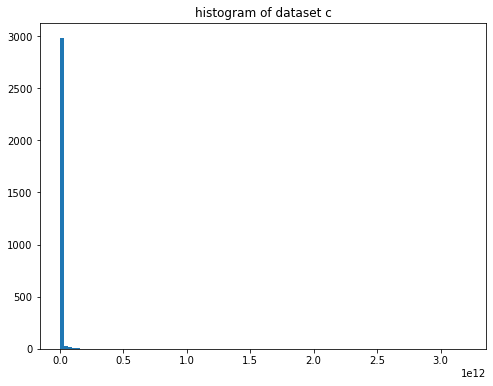

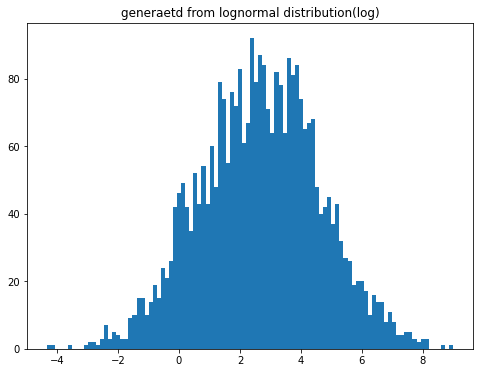

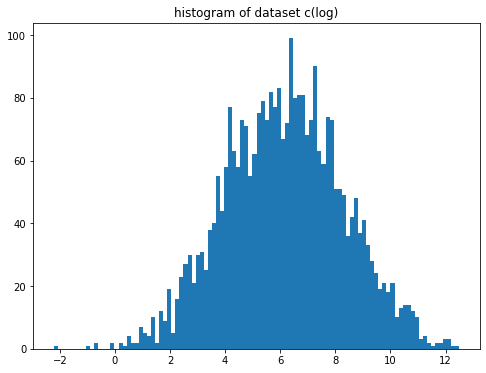

In [12]:
# mean and standard deviation
log_mean = log_c.mean()
print(log_mean)
log_var = log_c.var()
print(log_var)
s = np.random.lognormal(log_mean, log_var, data_c.size);
s_log = [np.log10(x) for x in s.tolist()]
s_log = pd.Series(s_log)

plt.figure(figsize=(8,6))
plt.hist(s,bins=100);
plt.title('generaetd from lognormal distribution')

plt.figure(figsize=(8,6))
plt.hist(data_c, bins=100);
plt.title('histogram of dataset c')


plt.figure(figsize=(8,6))
plt.hist(s_log,bins=100);
plt.title('generaetd from lognormal distribution(log)')

plt.figure(figsize=(8,6))
plt.hist(log_c, bins=100);
plt.title('histogram of dataset c(log)')



In [9]:
# f = Fitter(distr_a,distributions=['gamma','lognorm',"beta","burr","norm"])
# f.fit()
# f.summary()
# f.get_best(method = 'sumsquare_error')
# f.fitted_param